In [1]:
# dependencies
import os
import cv2
import numpy as np
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split

In [2]:
# Call VGGFace model
model_name = "Facenet"
model = DeepFace.build_model(model_name)

In [3]:
######################################################
# OWN CLASS TO STORE IMAGE PATHS AND CLASSES
######################################################

# own class to store path separate for intra vs inter class comparison
class facepath: 
    def __init__(self, path, faceno): 
        self.path = path 
        self.faceno = faceno

In [4]:
######################################################
# DATA LOADING
######################################################


###############################
# 1- PLAIN FACES
###############################

# how many faces / folders should we use as database
n_faces = 15
n_max_images_per_face = 5

# Load all filenames into a list
path = 'original_and_generated_faces/original/plain/' 
plain_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        plain_faces.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d plain face(s)" % (len(plain_faces), n_faces))
print("Example: %s [Face: %s]" % (plain_faces[0].path, plain_faces[0].faceno))
print("----------------------------------")

###############################
# 2- ENCRYPTED FACES L
###############################

# Load all filenames into a list
path = 'original_and_generated_faces/original/l_encrypted/' 
encrypted_l_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        encrypted_l_faces.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d encrypted layer progression order face(s)" % (len(encrypted_l_faces), n_faces))
print("Example: %s [Face: %s]" % (encrypted_l_faces[5].path, encrypted_l_faces[5].faceno))
print("----------------------------------")

###############################
# 3- ENCRYPTED FACES R
###############################

# Load all filenames into a list
path = 'original_and_generated_faces/original/r_encrypted/' 
encrypted_r_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        encrypted_r_faces.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d encrypted resolution progression order face(s)" % (len(encrypted_r_faces), n_faces))
print("Example: %s [Face: %s]" % (encrypted_r_faces[10].path, encrypted_r_faces[10].faceno))
print("----------------------------------")


#######################################################################
# 4 - PSP RECONSTRUCTED FACES R WITH TRAINED R - PRE ENHANCED WITH GFP 
#######################################################################

# Load all filenames into a list
path = 'original_and_generated_faces/gfpgan/psp_r_enc_trained_r_gfp_pre_enhanced'
r_enc_trained_r_gfp_pre_enhanced = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        r_enc_trained_r_gfp_pre_enhanced.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI r_enc_trained_r_gfp_pre_enhanced face(s)" % (len(r_enc_trained_r_gfp_pre_enhanced), n_faces))
print("Example: %s [Face: %s]" % (r_enc_trained_r_gfp_pre_enhanced[20].path, r_enc_trained_r_gfp_pre_enhanced[20].faceno))
print("----------------------------------")

#######################################################################
# 5 - PSP RECONSTRUCTED FACES L WITH TRAINED L - PRE ENHANCED WITH GFP 
#######################################################################

# Load all filenames into a list
path = 'original_and_generated_faces/gfpgan/psp_l_enc_trained_l_gfp_pre_enhanced'
l_enc_trained_l_gfp_pre_enhanced = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        l_enc_trained_l_gfp_pre_enhanced.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI l_enc_trained_l_gfp_pre_enhanced face(s)" % (len(l_enc_trained_l_gfp_pre_enhanced), n_faces))
print("Example: %s [Face: %s]" % (l_enc_trained_l_gfp_pre_enhanced[25].path, l_enc_trained_l_gfp_pre_enhanced[25].faceno))
print("----------------------------------")

#######################################################################
# 6 - PSP RECONSTRUCTED FACES R WITH TRAINED R - POST ENHANCED WITH GFP 
#######################################################################

# Load all filenames into a list
path = 'original_and_generated_faces/gfpgan/psp_r_enc_trained_r_gfp_post_enhanced'
r_enc_trained_r_gfp_post_enhanced = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        r_enc_trained_r_gfp_post_enhanced.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI r_enc_trained_r_gfp_post_enhanced face(s)" % (len(r_enc_trained_r_gfp_post_enhanced), n_faces))
print("Example: %s [Face: %s]" % (r_enc_trained_r_gfp_post_enhanced[20].path, r_enc_trained_r_gfp_post_enhanced[20].faceno))
print("----------------------------------")

#######################################################################
# 7 - PSP RECONSTRUCTED FACES L WITH TRAINED L - POST ENHANCED WITH GFP 
#######################################################################

# Load all filenames into a list
path = 'original_and_generated_faces/gfpgan/psp_l_enc_trained_l_gfp_post_enhanced'
l_enc_trained_l_gfp_post_enhanced = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        l_enc_trained_l_gfp_post_enhanced.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI l_enc_trained_l_gfp_post_enhanced face(s)" % (len(l_enc_trained_l_gfp_post_enhanced), n_faces))
print("Example: %s [Face: %s]" % (l_enc_trained_l_gfp_post_enhanced[25].path, l_enc_trained_l_gfp_post_enhanced[25].faceno))
print("----------------------------------")

###############################################################################
# 8 - PSP RECONSTRUCTED FACES L WITH TRAINED L - PRE AND POST ENHANCED WITH GFP 
###############################################################################

# Load all filenames into a list
path = '/home/nero/GitHub/encrypted_face_reconstruction/original_and_generated_faces/gfpgan/psp_l_enc_trained_l_gfp_pre_post_enhanced'
l_enc_trained_l_gfp_pre_post_enhanced = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        l_enc_trained_l_gfp_pre_post_enhanced.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI l_enc_trained_l_gfp_pre_post_enhanced face(s)" % (len(l_enc_trained_l_gfp_pre_post_enhanced), n_faces))
print("Example: %s [Face: %s]" % (l_enc_trained_l_gfp_pre_post_enhanced[25].path, l_enc_trained_l_gfp_pre_post_enhanced[25].faceno))
print("----------------------------------")


###############################################################################
# 9 - PSP RECONSTRUCTED FACES R WITH TRAINED R - PRE AND POST ENHANCED WITH GFP 
###############################################################################

# Load all filenames into a list
path = '/home/nero/GitHub/encrypted_face_reconstruction/original_and_generated_faces/gfpgan/psp_r_enc_trained_r_gfp_pre_post_enhanced'
r_enc_trained_r_gfp_pre_post_enhanced = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        r_enc_trained_r_gfp_pre_post_enhanced.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI r_enc_trained_r_gfp_pre_post_enhanced face(s)" % (len(r_enc_trained_r_gfp_pre_post_enhanced), n_faces))
print("Example: %s [Face: %s]" % (r_enc_trained_r_gfp_pre_post_enhanced[25].path, r_enc_trained_r_gfp_pre_post_enhanced[25].faceno))
print("----------------------------------")



###########################################
# 10 - GFP RECONSTRUCTED FACES L PRETRAINED
###########################################

# Load all filenames into a list
path = 'original_and_generated_faces/gfpgan/l_pretrained/'
l_enc_pretrained = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        l_enc_pretrained.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI l_enc_pretrained face(s)" % (len(l_enc_pretrained), n_faces))
print("Example: %s [Face: %s]" % (l_enc_pretrained[35].path, l_enc_pretrained[35].faceno))
print("----------------------------------")


###########################################
# 11 - GFP RECONSTRUCTED FACES R PRETRAINED
###########################################

# Load all filenames into a list
path = 'original_and_generated_faces/gfpgan/r_pretrained'
r_enc_pretrained = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        r_enc_pretrained.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI r_enc_pretrained face(s)" % (len(r_enc_pretrained), n_faces))
print("Example: %s [Face: %s]" % (r_enc_pretrained[40].path, r_enc_pretrained[40].faceno))
print("----------------------------------")

loaded 75 files from 15 plain face(s)
Example: original_and_generated_faces/original/plain/501181/501181_490210.jpg [Face: 1]
----------------------------------
loaded 75 files from 15 encrypted layer progression order face(s)
Example: original_and_generated_faces/original/l_encrypted/501182/501182_490232_j2k_l-W4-O6.png [Face: 2]
----------------------------------
loaded 75 files from 15 encrypted resolution progression order face(s)
Example: original_and_generated_faces/original/r_encrypted/501183/501183_490247_j2k_r-W4-O6.png [Face: 3]
----------------------------------
loaded 72 files from 15 AI r_enc_trained_r_gfp_pre_enhanced face(s)
Example: original_and_generated_faces/gfpgan/psp_r_enc_trained_r_gfp_pre_enhanced/501185/501185_490303_j2k_r-W4-O6.png [Face: 5]
----------------------------------
loaded 72 files from 15 AI l_enc_trained_l_gfp_pre_enhanced face(s)
Example: original_and_generated_faces/gfpgan/psp_l_enc_trained_l_gfp_pre_enhanced/501186/501186_490329_j2k_l-W4-O6.png [

In [5]:
######################################################
# OWN CLASS TO STORE IMAGE PATHS AND CLASSES
######################################################

class facepath: 
    def __init__(self, path, faceno): 
        self.path = path 
        self.faceno = faceno

######################################################
# INTRA AND INTER CLASS - FACE COMPARISON
######################################################
        
def compare_faces(set_a, set_b, comparison):

    '''
    function: 
        compare two sets of faces with an face recognition algorithm

    input:
        set_a: set of faces containing objects of facepath
        set_b: set of faces containing objects of facepath

    output:
        avg_dist: average distance metric for face comparison

    '''
                  
    # average distance between images
    avg_dist = 0.0


    k = 0

    # iterate over all faces
    for face_a in set_a:

        for face_b in set_b:

            if "intra" in comparison:

                # only compare intra class, not inter
                if face_a.faceno == face_b.faceno:

                    # compare faces
                    result = DeepFace.verify(face_a.path,
                                             face_b.path,
                                             enforce_detection=False,
                                             model_name ="Facenet") 
                    k += 1

                    # compute average face distance
                    avg_dist =  avg_dist + result['distance']
                    
            elif "inter" in comparison:

                # only compare inter class not intra
                if face_a.faceno is not face_b.faceno:

                    # compare faces
                    result = DeepFace.verify(face_a.path,
                                             face_b.path,
                                             enforce_detection=False,
                                             model_name ="Facenet") 

                    k += 1

                    # compute average face distance
                    avg_dist =  avg_dist + result['distance']
    avg_dist = float(avg_dist / k)
                
    return avg_dist

In [6]:
######################################################
# COMPUTING INTRA CLASS DISTANCES
######################################################

print("Intra Class Comparison:")
print("---------------------------------------------------------------------")

##########################
# ORIGINAL
##########################

avg_pp_intra = compare_faces(plain_faces, plain_faces, "intra")
print("Avg. Intra-Class Distance PLAIN VS PLAIN: \t\t\t%.2f" % avg_pp_intra)

avg_enc_l_p_intra = compare_faces(encrypted_l_faces, plain_faces, "intra")
print("Avg. Intra-Class Distance LAYER-ENCRYPTED VS PLAIN: \t\t%.2f" % avg_enc_l_p_intra)

avg_enc_r_p_intra = compare_faces(encrypted_r_faces, plain_faces, "intra")
print("Avg. Intra-Class Distance RES_ENCRYPTED VS PLAIN: \t\t%.2f" % avg_enc_r_p_intra)

##########################
# GFP PRE - PSP
##########################

avg_r_enc_trained_r_gfp_pre_enhanced_intra = compare_faces(r_enc_trained_r_gfp_pre_enhanced, plain_faces, "intra")
print("Avg. Intra-Class Distance AI PRE ENHANCED WITH GFP (PSP R TRAINED) R VS PLAIN: \t\t%.2f" % avg_r_enc_trained_r_gfp_pre_enhanced_intra)

avg_l_enc_trained_l_gfp_pre_enhanced_intra = compare_faces(l_enc_trained_l_gfp_pre_enhanced, plain_faces, "intra")
print("Avg. Intra-Class Distance AI PRE ENHANCED WITH GFP (PSP L TRAINED) L VS PLAIN: \t\t%.2f" % avg_l_enc_trained_l_gfp_pre_enhanced_intra)

##########################
# GFP POST - PSP
##########################

avg_r_enc_trained_r_gfp_post_enhanced_intra = compare_faces(r_enc_trained_r_gfp_post_enhanced, plain_faces, "intra")
print("Avg. Intra-Class Distance AI POST ENHANCED WITH GFP (PSP R TRAINED) R VS PLAIN: \t\t%.2f" % avg_r_enc_trained_r_gfp_post_enhanced_intra)

avg_l_enc_trained_l_gfp_post_enhanced_intra = compare_faces(l_enc_trained_l_gfp_post_enhanced, plain_faces, "intra")
print("Avg. Intra-Class Distance AI POST ENHANCED WITH GFP (PSP L TRAINED) L VS PLAIN: \t\t%.2f" % avg_l_enc_trained_l_gfp_post_enhanced_intra)

##########################
# GFP PRE POST - PSP
##########################

avg_l_enc_trained_l_gfp_pre_post_enhanced_intra = compare_faces(l_enc_trained_l_gfp_pre_post_enhanced, plain_faces, "intra")
print("Avg. Intra-Class Distance AI PRE & POST ENHANCED WITH GFP (PSP R TRAINED) R VS PLAIN: \t%.2f" % avg_l_enc_trained_l_gfp_pre_post_enhanced_intra)

avg_r_enc_trained_r_gfp_pre_post_enhanced_intra = compare_faces(r_enc_trained_r_gfp_pre_post_enhanced, plain_faces, "intra")
print("Avg. Intra-Class Distance AI PRE & POST ENHANCED WITH GFP (PSP L TRAINED) L VS PLAIN: \t%.2f" % avg_r_enc_trained_r_gfp_pre_post_enhanced_intra)

##########################
# GFP PRETRAINED W/O PSP
##########################

avg_l_enc_pretrained_intra = compare_faces(l_enc_pretrained, plain_faces, "intra")
print("Avg. Intra-Class Distance AI (PRE TRAINED GFP) L VS PLAIN: \t%.2f" % avg_l_enc_pretrained_intra)

avg_r_enc_pretrained_intra = compare_faces(r_enc_pretrained, plain_faces, "intra")
print("Avg. Intra-Class Distance AI (PRE TRAINED GFP) L VS PLAIN: \t%.2f" % avg_r_enc_pretrained_intra)

print("---------------------------------------------------------------------")


Intra Class Comparison:
---------------------------------------------------------------------
Avg. Intra-Class Distance PLAIN VS PLAIN: 			0.41
Avg. Intra-Class Distance LAYER-ENCRYPTED VS PLAIN: 		0.92
Avg. Intra-Class Distance RES_ENCRYPTED VS PLAIN: 		0.76
Avg. Intra-Class Distance AI PRE ENHANCED WITH GFP (PSP R TRAINED) R VS PLAIN: 		0.65
Avg. Intra-Class Distance AI PRE ENHANCED WITH GFP (PSP L TRAINED) L VS PLAIN: 		0.77
Avg. Intra-Class Distance AI POST ENHANCED WITH GFP (PSP R TRAINED) R VS PLAIN: 		0.68
Avg. Intra-Class Distance AI POST ENHANCED WITH GFP (PSP L TRAINED) L VS PLAIN: 		0.77
Avg. Intra-Class Distance AI PRE & POST ENHANCED WITH GFP (PSP R TRAINED) R VS PLAIN: 	0.80
Avg. Intra-Class Distance AI PRE & POST ENHANCED WITH GFP (PSP L TRAINED) L VS PLAIN: 	0.71
Avg. Intra-Class Distance AI (PRE TRAINED GFP) L VS PLAIN: 	0.88
Avg. Intra-Class Distance AI (PRE TRAINED GFP) L VS PLAIN: 	0.71
---------------------------------------------------------------------


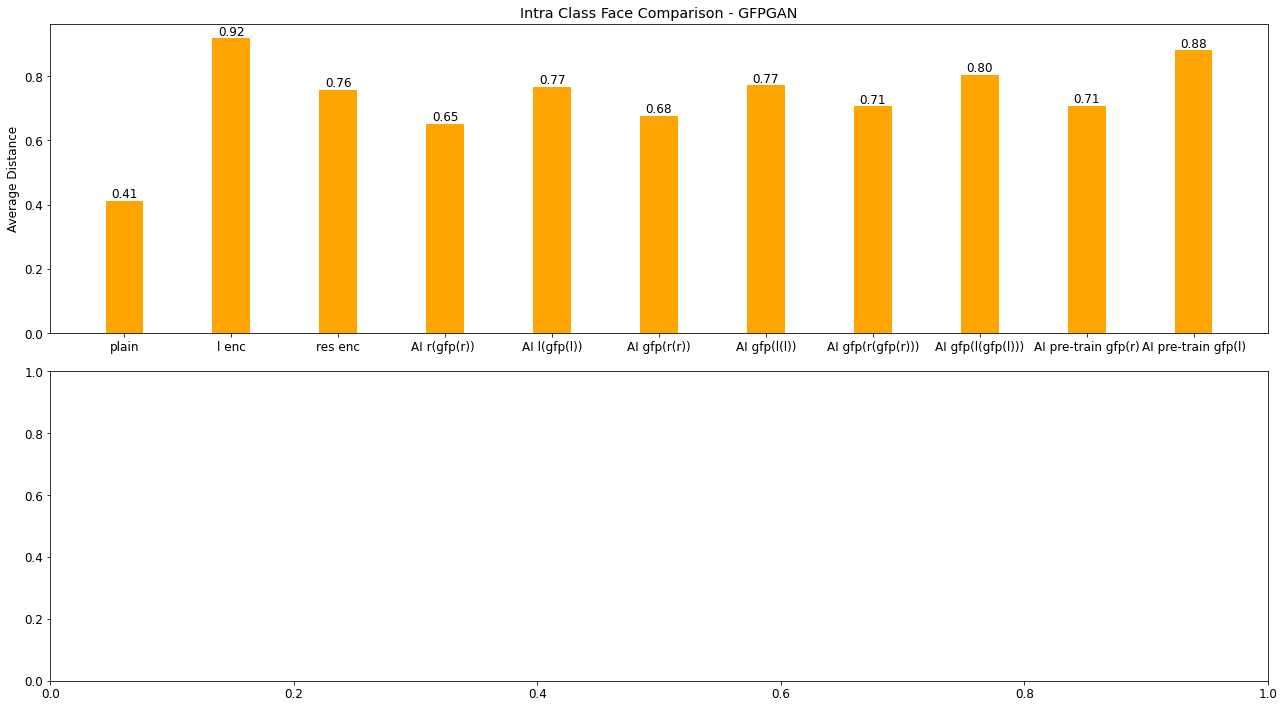

In [9]:
######################################################
# INTRA AND INTER CLASS - FACE COMPARISON - PLOT
######################################################

# Setting font of the Plot
font = {'weight' : 'normal',
        'size'   : 12
       }

matplotlib.rc('font', **font)

# Lables and Values
labels_intra = ['plain', 'l enc', 'res enc', 'AI r(gfp(r))', 'AI l(gfp(l))', 'AI gfp(r(r))',
                'AI gfp(l(l))', 'AI gfp(r(gfp(r)))', 'AI gfp(l(gfp(l)))', 'AI pre-train gfp(r)', 'AI pre-train gfp(l)']

values_intra = [avg_pp_intra, avg_enc_l_p_intra, avg_enc_r_p_intra,
                avg_r_enc_trained_r_gfp_pre_enhanced_intra, avg_l_enc_trained_l_gfp_pre_enhanced_intra,
                avg_r_enc_trained_r_gfp_post_enhanced_intra, avg_l_enc_trained_l_gfp_post_enhanced_intra,
                avg_r_enc_trained_r_gfp_pre_post_enhanced_intra, avg_l_enc_trained_l_gfp_pre_post_enhanced_intra,
                avg_r_enc_pretrained_intra, avg_l_enc_pretrained_intra]

# Bar width and generating X values to place the bars
x = np.arange(len(labels_intra))  # the label locations
width = 0.35  # the width of the bars

# create suplots
fig, axs = plt.subplots(2,1, figsize=(18,10))
rects_intra = axs[0].bar(x - width/2, values_intra, width, align='edge', color='orange')

########################
# INTRA CLASS PLOT
########################

# Add some text for labels, tiSle and custom x-axis tick labels, etc.
axs[0].set_ylabel('Average Distance')
axs[0].set_title('Intra Class Face Comparison - GFPGAN')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels_intra)

# average distances
axs[0].bar_label(rects_intra, fmt='%.2f')

fig.tight_layout()

plt.show()